# Covid-19 Mathematical Modelling Project

1. [Introduction](#introduction)
2. [Importing of relevant modules](#Importing)
3. [Table of the latest Covid-19 figures for each Country](#table) 
4. [Graph showing the cumulative total of world cases from 1/22/20 to 8/14/20](#graph1)
    1. [Graph Analysis](#analysis1)
5. [Graph showing the UK's daily increase in cases and deaths from 1/22/20 to 8/14/20](#graph2)
    1. [Graph Analysis](#analysis2)
6. [The SIR epidemiological model](#sir)
7. [The current number of cases for 12 countries](#count)
8. [The UK's daily increase on a 7 day rolling average](#roll)
9. [Model of the expected number of infected individuals in the UK\n for different estimates of the transmission rate](#rrate)
10. [Model of the expected number of infected individuals in the UK\n for different estimates of the transmission rate](#ratess)

## Introduction <a name="introduction"></a>
Covid-19 is the name of the newly discovered coronavirus disease associated with SARS-CoV-2. The virus outbreak originated in Wuhan, China during December of 2019. Since then, it has spread to nearly every country in the world and has infected at least 22.5 million people worldwide. On 11/03/2020, The World Health Organisation has declared Covid-19 a global pandemic. It is a positive-sensed single stranded RNA virus that is contagious in humans. One infected individual is expected to spread the virus onto 1.4 - 3.9 other individuals. The mode of transmission is through close contact and via respiratory droplets. It is believed to have zoonotic origins and has a close genetic similarity to bat coronaviruses. 

## Importing of relevant modules and data <a name="Importing"></a>

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import mplcursors
from numpy import exp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
import math
import time
import astropy.table
from astropy.table import QTable, Table, Column
from astropy import units as u
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure


confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-15-2020.csv')

#latest_data.head()
#confirmed_df.head()
#deaths_df.head()
#recoveries_df.head()

In [4]:
cols = confirmed_df.keys()
columns = latest_data.keys()
#rows = latest_data.values()

#confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
#dates = confirmed.keys()

t = Table()
t["Countries"] = latest_data.loc[:, columns[3]]
t["Province/Area"] = latest_data.loc[:, columns[2]]
t["Confirmed cases"] = latest_data.loc[:, columns[7]]
t["Confirmed Deaths"] = latest_data.loc[:,columns[8]]
t["Total Recovered"] = latest_data.loc[:, columns[9]]
t["Active Cases"] = latest_data.loc[:, columns[10]]
t["Case to Fatality ratio"] = latest_data.loc[:,columns[-1]]

## Table showing latest Covid-19 figures for each Country and their respective Provinces/Areas <a name="table"></a>
The following table displays the latest information for the total confirmed cases, deaths, recovered. Furthermore it shows the total number of active cases and the case to fatality ratio. This information is shown for all Countries and their respective Provinces/Areas.

In [15]:
t.show_in_notebook(display_length=10)

idx,Countries,Province/Area,Confirmed cases,Confirmed Deaths,Total Recovered,Active Cases,Case to Fatality ratio
0,Afghanistan,nan,37551,1370,27166,9015.0,3.648371548028016
1,Albania,nan,7260,225,3746,3289.0,3.0991735537190084
2,Algeria,nan,38133,1360,26644,10129.0,3.5664647418246664
3,Andorra,nan,989,53,863,73.0,5.358948432760363
4,Angola,nan,1879,86,628,1165.0,4.576902607770091
5,Antigua and Barbuda,nan,93,3,83,7.0,3.2258064516129035
6,Argentina,nan,289100,5637,205697,77766.0,1.949844344517468
7,Armenia,nan,41495,817,34484,6194.0,1.9689119170984453
8,Australia,Australian Capital Territory,113,3,110,0.0,2.6548672566371683
9,Australia,New South Wales,3950,52,2994,904.0,1.3164556962025316


In [5]:
cols = confirmed_df.keys()

confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)

#print("Currently there is a total of " + str(world_cases[-1]) + " Covid-19 cases in the world.")

## Graph showing the cumulative total world cases from 1/22/20 to 8/14/20 on a log scale  <a name="graph1"></a>

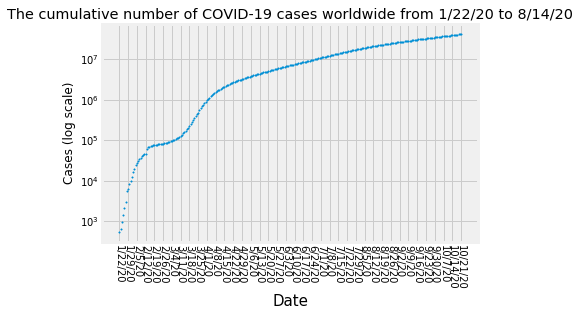

In [8]:
%matplotlib inline

world_cases = list(map(int, world_cases))

formatted_total_cases = []
for i in range(0,len(world_cases)):
    formatted_total_cases.append(format(world_cases[i], '.0f'))
    
formatted_total_cases = list(map(int, formatted_total_cases))

dates_list = list(cols[4:])

x_plot = dates_list
y_plot = formatted_total_cases

plot1 = plt.scatter(x_plot, y_plot, s = 2, marker = 'o')
plt.grid()
#plt.path.Path(y_plot)
plt.rcParams["figure.figsize"]=15,10
plt.xlabel('Date', color = 'k', fontsize = 15)
plt.xticks(rotation=270)
x_ticks = np.arange(0, len(x_plot), 7)
plt.xticks(x_ticks)
plt.yscale("log")
plt.title("The cumulative number of COVID-19 cases worldwide from 1/22/20 to 8/14/20")
plt.ylabel("Cases (log scale)")

mplcursors.cursor(plot1, hover=True)
plt.grid()
plt.show()

#### Graph Analysis <a name="analysis1"></a>

From the end of 1/22/20 to 2/12/20 there was a marked increase in Covid-19 cases from approximately 1000 to 100,000. After this significant increase, there was a lag phase where the total number of cases stayed steady around approximately 100,000. The lag phase lasted 3 weeks then cases increased strikingly to around 2 million in the week of 4/15/20 . From this week onwards, an approximately linear line can be seen on the log scale graph indicating that there has been an exponential rise in the cases until 8/14/20. There is no indication from the graph that this exponential trend will flatten in the next few weeks. 

## Graph showing the UK's daily increase in Covid-19 cases and deaths  <a name="graph2"></a>

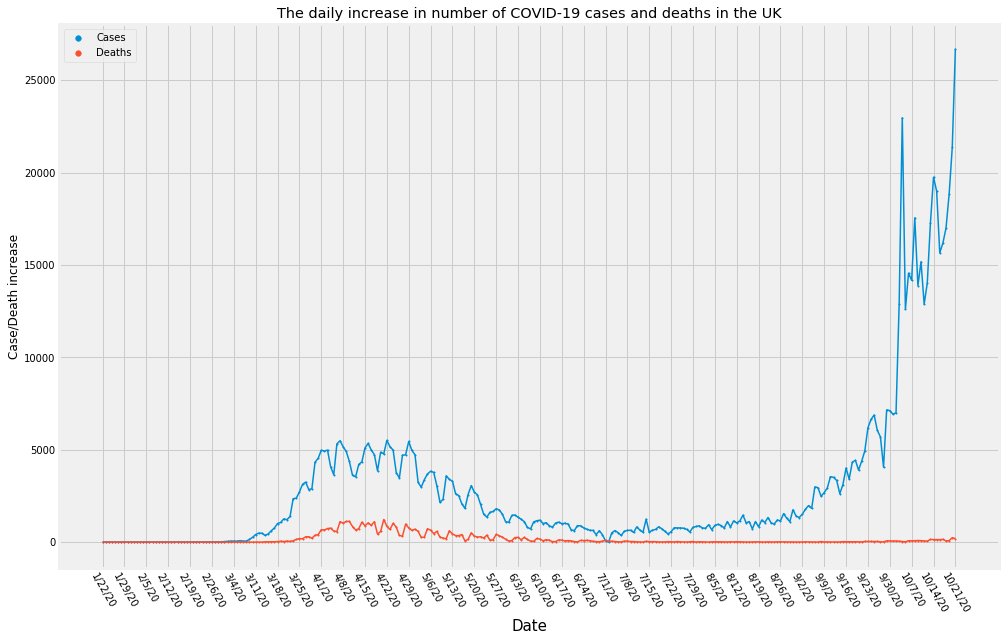

In [9]:
uk_total_cases = []
uk_total_deaths = []
uk_total_recoveries = []

for i in dates:
    uk_total_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    uk_total_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    uk_total_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

window = 7
uk_daily_increase = daily_increase(uk_total_cases)
uk_daily_death = daily_increase(uk_total_deaths)
uk_daily_recovery = daily_increase(uk_total_recoveries)

uk_daily_increase = list(map(int, uk_daily_increase))
uk_daily_deaths = list(map(int, uk_daily_death))

dates_list = list(cols[4:])

x_plot2 = dates_list
y_plot2 = uk_daily_increase
y_plot3 = uk_daily_death

plot2 = plt.scatter(x_plot2, y_plot2, s = 2, marker = 'o', label = "Cases")
plt.grid(axis = 'both')
plt.plot(x_plot2, y_plot2, linewidth = 1.5)
plot3 = plt.scatter(x_plot2, y_plot3, s = 2, marker = 'o', label = "Deaths")
plt.plot(x_plot2, y_plot3, linewidth = 1.5)
plt.rcParams["figure.figsize"]=12,8
plt.xlabel('Date', color = 'k', fontsize = 15)
plt.xticks(rotation=300)
x_ticks = np.arange(0, len(x_plot), 7)
plt.xticks(x_ticks)
plt.legend(markerscale = 4)
#plt.yscale("log")
plt.title("The daily increase in number of COVID-19 cases and deaths in the UK")
plt.ylabel("Case/Death increase")

mplcursors.cursor(plot2, hover=True)
mplcursors.cursor(plot3, hover=True)
plt.grid(axis = 'both')

plt.show()

#### Graph Analysis <a name="analysis2"></a>

You can interpret from the graph that from 22/01/20 there has been a marked increase in daily cases to 4/1/20. This peak stayed contstant at around 3800 - 5500 daily cases for a month. From the beginning of May to 7/1/20 there has been a steady decrease of daily cases. However from 7/1/20 onwards the number of new cases has been slowly rising steadily. Deaths follow a similar trend up until July, with a peak number of deaths at 1224 in the week of 4/22/20. After July, unlike new cases, the new number of daily deaths has steadily decreased. From September onwards the number of cases have markedly increased but deaths have stayed low 

## The SIR epidemiological model <a name="sir"></a>

The SIR model is an epidemiological model that computes the theoretical number of people infected with a contagious illness in a closed population over time.

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t) are those susceptible but not yet infected with the disease;
I(t) is the number of infectious individuals;
R(t) are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ. β describes the effective contact rate of the disease: an infected individual comes into contact with βN other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N). γ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model are as follows:

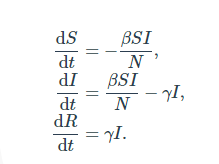


If s is the fraction of the population that’s susceptible, sN is the number of susceptible people, βsN is the number of contacts per day, and βsiN (R) is the number of those contacts where the other person is infectious. The Imperial College group has estimated the rate of infection, R, is between 0.8 and 1. Hence, I will model simulations that project future cases using values in that range. 

If the time between recoveries is 7 days, therecovery rate is about 1/7 recoveries per day, which we’ll denote with the Greek letter gamma, γ. If the total number of people in the population is N, and the fraction currently infectious is i, the total number of recoveries we expect per day is γiN.

Below shows the SIR mdoel applied to the UK Covid-19 outbreak.

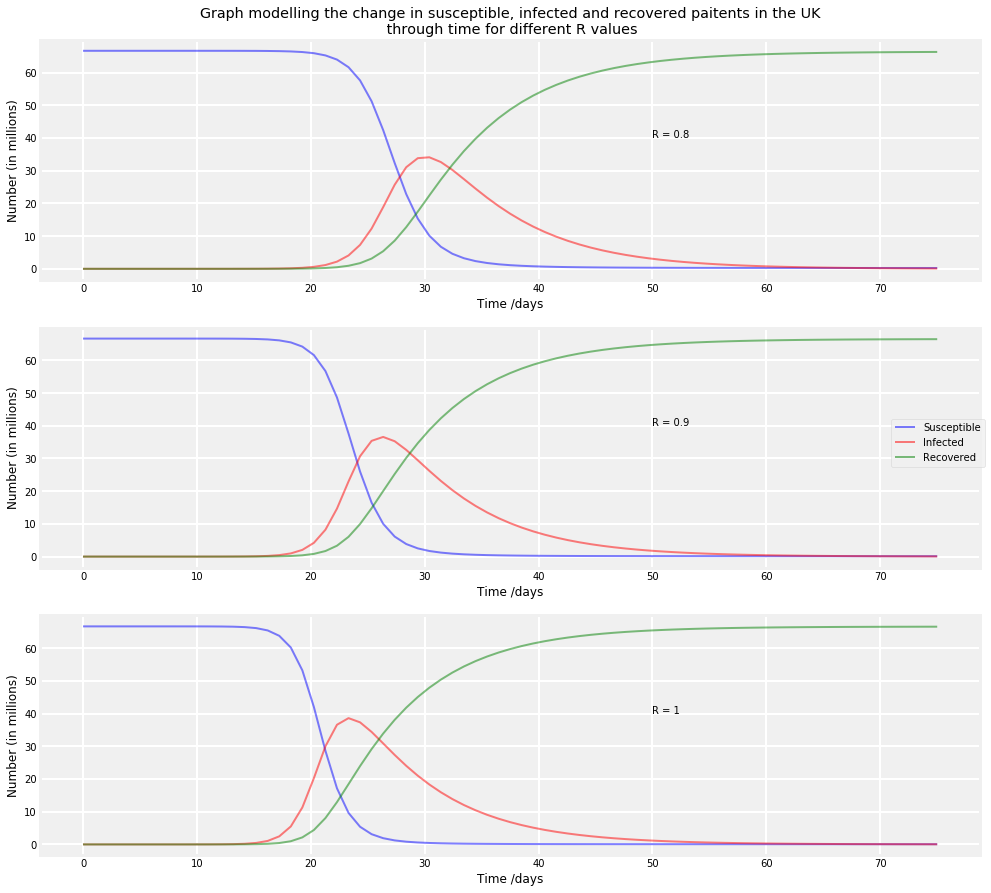

In [11]:
# Total population, N.
N = 66650000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta1, beta2, beta3, gamma = 0.8, 0.9, 1, 1/7 
# A grid of time points (in days)
t = np.linspace(0, 75, 75)

# The SIR model differential equations.
def deriv(y, t, N, beta1, gamma):
    S_1, I_1, R_1 = y
    dSdt = -beta1 * S_1 * I_1 / N
    dIdt = beta1 * S_1 * I_1 / N - gamma * I_1
    dRdt = gamma * I_1
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta1, gamma))
S_1, I_1, R_1 = ret.T

def deriv(y, t, N, beta2, gamma):
    S_2, I_2, R_2 = y
    dSdt = -beta2 * S_2 * I_2 / N
    dIdt = beta2 * S_2 * I_2 / N - gamma * I_2
    dRdt = gamma * I_2
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta2, gamma))
S_2, I_2, R_2 = ret.T

def deriv(y, t, N, beta3, gamma):
    S_3, I_3, R_3 = y
    dSdt = -beta3 * S_3 * I_3 / N
    dIdt = beta3 * S_3 * I_3 / N - gamma * I_3
    dRdt = gamma * I_3
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta3, gamma))
S_3, I_3, R_3 = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (15,15))

ax1.set_title("Graph modelling the change in susceptible, infected and" +
          " recovered paitents in the UK\n through time for different R values")

ax1.plot(t, S_1/1000000, 'b', alpha=0.5, lw=2)
ax1.plot(t, I_1/1000000, 'r', alpha=0.5, lw=2)
ax1.plot(t, R_1/1000000, 'g', alpha=0.5, lw=2)

ax2.plot(t, S_2/1000000, 'b', alpha=0.5, lw=2, label = "Susceptible")
ax2.plot(t, I_2/1000000, 'r', alpha=0.5, lw=2, label = "Infected")
ax2.plot(t, R_2/1000000, 'g', alpha=0.5, lw=2, label = "Recovered")
ax2.legend(loc='lower left', bbox_to_anchor=(0.9, 0.4))

ax3.plot(t, S_3/1000000, 'b', alpha=0.5, lw=2)
ax3.plot(t, I_3/1000000, 'r', alpha=0.5, lw=2)
ax3.plot(t, R_3/1000000, 'g', alpha=0.5, lw=2)

ax1.set_xlabel('Time /days')
ax1.set_ylabel('Number (in millions)')
ax2.set_xlabel('Time /days')
ax2.set_ylabel('Number (in millions)')
ax3.set_xlabel('Time /days')
ax3.set_ylabel('Number (in millions)')

ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
ax3.grid(b=True, which='major', c='w', lw=2, ls='-')

ax1.text(50, 40, "R = 0.8")
ax2.text(50, 40, "R = 0.9")
ax3.text(50, 40, "R = 1")
    
plt.show()

In [12]:
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = [] 
brazil_cases = []
india_cases = []
peru_cases = [] 
south_africa_cases = [] 

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
brazil_deaths = [] 
india_deaths = []
peru_deaths = []
south_africa_deaths = []

for i in dates:
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Russia'][i].sum())
    brazil_cases.append(confirmed_df[confirmed_df['Country/Region']=='Brazil'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    peru_cases.append(confirmed_df[confirmed_df['Country/Region']=='Peru'][i].sum())
    south_africa_cases.append(confirmed_df[confirmed_df['Country/Region']=='South Africa'][i].sum())
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_df[deaths_df['Country/Region']=='Russia'][i].sum())
    brazil_deaths.append(deaths_df[deaths_df['Country/Region']=='Brazil'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    peru_deaths.append(deaths_df[deaths_df['Country/Region']=='Peru'][i].sum())
    south_africa_deaths.append(deaths_df[deaths_df['Country/Region']=='Peru'][i].sum())


In [13]:
countries = ["China", "Italy", "US", "Spain", "France", "Germany", "UK", "Russia", "Brazil", "India", "Peru", "South Africa"]
countries_recent_case_toll = []
countries_recent_death_toll = []

countries_recent_case_toll.append(us_cases[-1])
countries_recent_case_toll.append(brazil_cases[-1])
countries_recent_case_toll.append(india_cases[-1])
countries_recent_case_toll.append(russia_cases[-1])
countries_recent_case_toll.append(south_africa_cases[-1])
countries_recent_case_toll.append(peru_cases[-1])
countries_recent_case_toll.append(spain_cases[-1])
countries_recent_case_toll.append(uk_cases[-1])
countries_recent_case_toll.append(france_cases[-1])
countries_recent_case_toll.append(italy_cases[-1])
countries_recent_case_toll.append(germany_cases[-1])
countries_recent_case_toll.append(china_cases[-1])

print(countries_recent_case_toll)

countries_recent_death_toll.append(us_deaths[-1])
countries_recent_death_toll.append(brazil_deaths[-1])
countries_recent_death_toll.append(india_deaths[-1])
countries_recent_death_toll.append(russia_deaths[-1])
countries_recent_death_toll.append(south_africa_deaths[-1])
countries_recent_death_toll.append(peru_deaths[-1])
countries_recent_death_toll.append(spain_deaths[-1])
countries_recent_death_toll.append(uk_deaths[-1])
countries_recent_death_toll.append(france_deaths[-1])
countries_recent_death_toll.append(italy_deaths[-1])
countries_recent_death_toll.append(germany_deaths[-1])
countries_recent_death_toll.append(china_deaths[-1])

#print(countries_recent_death_toll)

[8336031, 5298772, 7706946, 1438219, 708359, 874118, 1005295, 792194, 1000369, 449648, 397922, 91044]
[222176, 155403, 116616, 24786, 33875, 33875, 34366, 44248, 34075, 36832, 9911, 4739]


## The number of cases for 12 countries:  <a name="count"></a>

Below shows the current number of Covid-19 cases for 12 countries: 

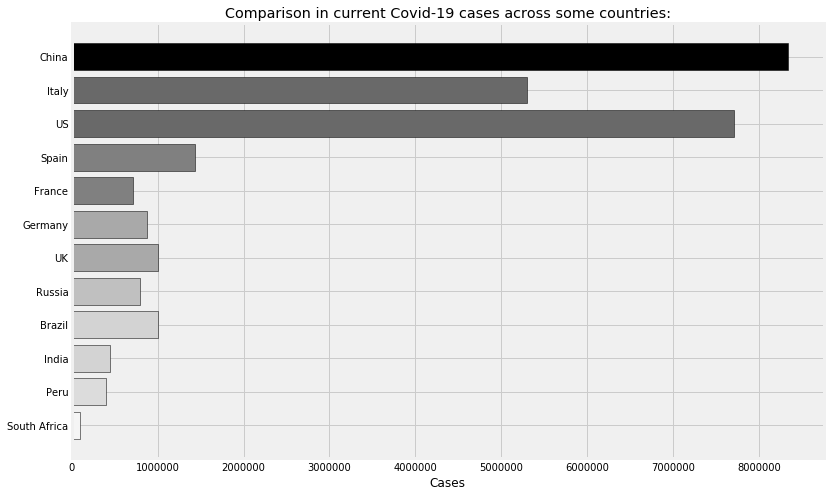

In [14]:
fig, ax = plt.subplots()

x_plot2 = countries
y_plot2 = countries_recent_case_toll
 
ax.barh(x_plot2, y_plot2, edgecolor = 'black', 
        color=['black', 'dimgray', 'dimgrey', 'gray', 'grey',
               'darkgray', 'darkgrey', 'silver','lightgray',
               'lightgrey', 'gainsboro', 'whitesmoke', 'white'])
ax.set_yticks(np.arange(len(countries)))
ax.set_yticklabels(countries)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cases')
ax.set_title('Comparison in current Covid-19 cases across some countries:')
mplcursors.cursor(hover=True)

plt.show()

## The UK daily increase on a 7 day rolling average <a name="roll"></a>

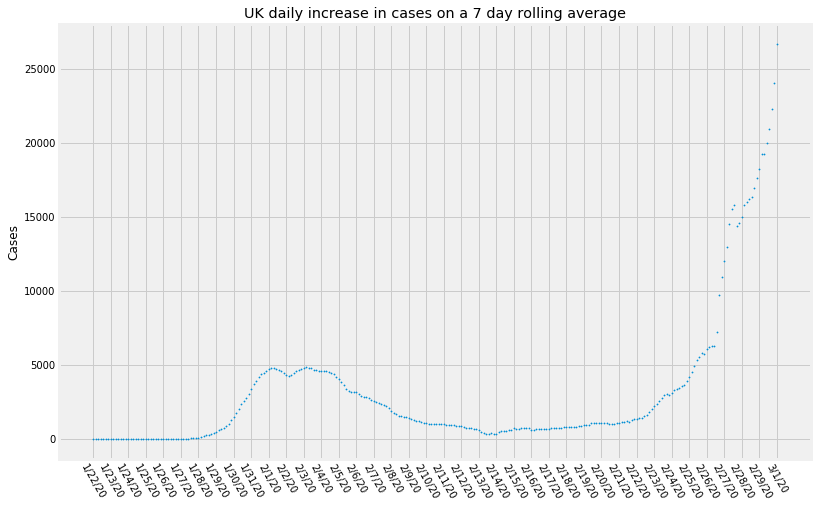

In [18]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

uk_daily_increase = daily_increase(uk_cases)

uk_moving_average = moving_average(uk_daily_increase, window)

x_plot3 = np.arange(0,len(uk_moving_average))
y_plot3 = uk_moving_average 

fig, ax = plt.subplots()

ax.scatter(x_plot3, y_plot3, marker = 'o', s = 1.5)
ax.set_title("UK daily increase in cases on a 7 day rolling average")
ax.set_xticks(np.arange(0,len(dates),7))
ax.set_xticklabels(dates)
plt.xticks(rotation=300)
ax.set_ylabel("Cases")
mplcursors.cursor(hover=True)
plt.show()

In [19]:
# σ=1/5.2  to reflect an average incubation period of 7 days.
# γ=1/18 to match an average illness duration of 18 days.
# pop_size = population of the UK currently (19/08/20)

pop_size = 67933697

γ = 1 / 18
σ = 1 / 7

#x is the state vector (array_like) with s = susceptibe, e = exposed, i = infected
#t is time (scalar)
#R0 is the effective transmission rate, defaulting to a constant

def F(x, t, R0=1.6):
    
    s, e, i = x

    # New exposure of susceptibles
    β = R0(t) * γ if callable(R0) else R0 * γ
    ne = β * s * i

    # Time derivatives for s, e and i 
    ds = - ne
    de = ne - σ * e
    di = σ * e - γ * i

    return ds, de, di

i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0

#In vector form the initial condition is

x_0 = s_0, e_0, i_0

def solve_path(R0, t_vec, x_init=x_0):
    
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0. c(t) is the cumulative cases at time, t

    """
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return i_path, c_path

t_length = 550     #days of the model simualtion
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

## Model of the expected number of infected individuals in the UK\n for different estimates of the transmission rate 

<a name="rrate"></a>


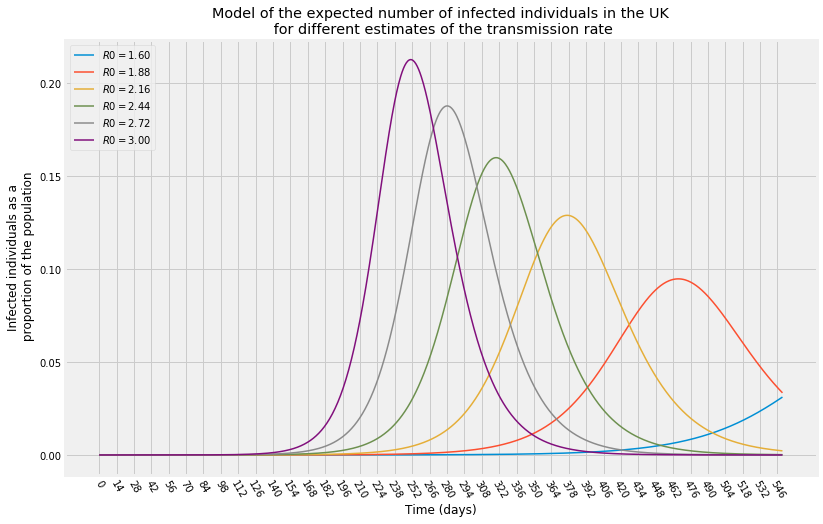

In [17]:
R0_vals = np.linspace(1.6, 3.0, 6)

# R0 is the effective transmission rate and varies from 1.6 to 3

labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [], []

for r in R0_vals:
    i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

#Here’s some code to plot the time paths.

def plot_paths(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label, linewidth = 1.5)

    ax.legend(loc='upper left')
    ax.set_title("Model of the expected number of infected individuals in the UK\n for different estimates of the transmission rate")
    ax.set_xlabel("Time (days)")
    ax.set_xticks(np.arange(0,550, 14))
    ax.set_ylabel("Infected individuals as a\n proportion of the population")
    mplcursors.cursor(hover=True)
    plt.xticks(rotation=300)
    plt.show()
    
def plot_paths2(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label, linewidth = 1.5)

    ax.legend(loc='upper left')
    ax.set_title("Model of the expected number of infected individuals in the UK\n with different levels of social distancing")
    ax.set_xlabel("Time (days)")
    ax.set_xticks(np.arange(0,550, 14))
    ax.set_ylabel("Infected individuals as a\n proportion of the population")
    mplcursors.cursor(hover=True)
    plt.xticks(rotation=300)
    plt.show()
    
plot_paths(i_paths, labels)

## Model of the expected number of infected individuals in the UK\n for different estimates of the transmission rate  

<a name="ratess"></a>

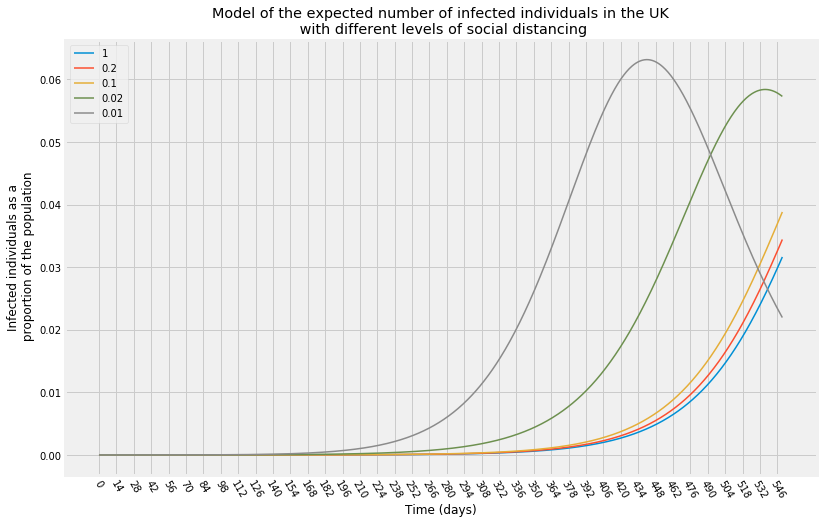

In [20]:
# now a implemented version whereby social distancing is added into the equation

def R0_mitigating(t, r0=3, sd=1, r_bar=1.6):
    R0 = r0 * exp(- sd * t) + (1 - exp(- sd * t)) * r_bar
    return R0

# sd values can range based on levels of social distancing with 1 everyone is isolated and 0.01 being 1 in 
# every 100 is isolated

sd_values = [1, 0.2, 0.1, 0.02, 0.01]

labels = []

for i in range(0, len(sd_values)):
    labels.append(str(sd_values[i]))

i_paths, c_paths = [], []

for sd in sd_values:
    R0 = lambda t: R0_mitigating(t, sd=sd)
    i_path, c_path = solve_path(R0, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

plot_paths2(i_paths, labels)
plt.show()